Αρχικά επειδή τα εργαλεία που θα χρησιμοποιήσουμε ειναι case sensitive θα μετατρέψουμε το training set μας σε lowercase

In [1]:
with open('../twitter_data/train2017.tsv', 'r', encoding="utf8") as fileInput:
#with open('test.tsv', 'r', encoding="utf8") as fileInput:
    text = ''
    for line in fileInput:
        line = line.lower()
        text += line
    #print(text)


Aφαίρεση των URL

In [2]:
import re
text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', ' ! ', text)
text = text.replace('can\'t',' cant ')
text = text.replace(' u ', ' you ')

Σπάσιμο κειμένου σε tweet για να επεξεργαστούμε το καθένα ξεχωριστά

In [3]:
tweetList = text.splitlines()
#print(tweetList)

Σπάσιμο tweet σε λέξεις

In [4]:
from nltk import word_tokenize
tokenedTweetList = []
for tweet in tweetList:
    tokenedTweetList.append(word_tokenize(tweet))
#print(tokenedTweetList)

Αφαίρεση των tags

In [5]:
for tweet in tokenedTweetList:
    for word in tweet:
        if word == '@':
            tweet.remove(tweet[tweet.index(word)+1])
            tweet.remove(tweet[tweet.index(word)])
#print(tokenedTweetList)

Καθάρισμα σημείων στήξεως

In [6]:
from string import punctuation
clearedTweetList = []
for tweet in tokenedTweetList:
    for word in tweet:
        tokenedTweetList[tokenedTweetList.index(tweet)][tweet.index(word)] = word.strip(punctuation)
#print(tokenedTweetList)


Καθάρισμα απο stopwords και κενα tokens

In [7]:
from nltk.corpus import stopwords

cleanedTweetList = []

for tweet in tokenedTweetList:
    cleanedTweet = []
    for word in tweet:
        if word not in stopwords.words('english') and word != '':
            cleanedTweet.append(word);
    cleanedTweetList.append(cleanedTweet)
#print(cleanedTweetList)

In [8]:
file = open('filteredTweets.tsv', 'w', encoding="utf8")

for tweet in cleanedTweetList:
    for word in tweet:
        file.write(word + ' ')
    file.write('\n')
file.close()

Θα διαχωρήσουμε τα positive/negative/neutral tweets σε διαφορετικά αρχεία για μα διευκολήνουμε την επεξεργασία τους

In [ ]:
file = open('positiveTweets.tsv', 'w', encoding="utf8")

for tweet in cleanedTweetList:
    if tweet[2] == 'positive':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('negativeTweets.tsv', 'w', encoding="utf8")

for tweet in cleanedTweetList:
    if tweet[2] == 'negative':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('neutralTweets.tsv', 'w', encoding="utf8")

for tweet in cleanedTweetList:
    if tweet[2] == 'neutral':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()


 Οι 50 πιο συχνά χρησιμοποιημένες λέξεις στα θετικά tweets

In [ ]:
from collections import Counter
import pandas as pd 
from nltk import word_tokenize

with open('positiveTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

positiveTweetList = []
for tweet in tweetList:
    positiveTweetList.append(word_tokenize(tweet))

count = Counter(' ')
for tweet in positiveTweetList:
    count +=  Counter(tweet)
    
dataFrame = pd.DataFrame(data =count.most_common(50), columns=['Word', 'Count'])
dataFrame

,Word,Count
0,tomorrow,2122
1,may,1186
2,day,1158
3,see,928
4,night,884
5,good,851
6,going,831
7,friday,685
8,time,655
9,love,631


Για την δημιουργία του Word Cloud θα χρησιμοποιησουμε το παρακάτω πακέτο(https://anaconda.org/conda-forge/wordcloud)

Oι 50 πιο συχνά χρησιμοποιημένες λέξεις για τα αρνητικά tweets

In [ ]:
from collections import Counter

with open('negativeTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

negativeTweetList = []
for tweet in tweetList:
    negativeTweetList.append(word_tokenize(tweet))

count = Counter(' ')
for tweet in negativeTweetList:
    count +=  Counter(tweet)
    
dataFrame = pd.DataFrame(data =count.most_common(20), columns=['Word', 'Count'])
dataFrame

,Word,Count
0,may,650
1,tomorrow,624
2,n't,579
3,like,342
4,going,320
5,day,289
6,go,267
7,1st,258
8,get,246
9,time,243


Οι 50 πιο συχνά χρησιμοποιημένες λέξεις για τα ουδέτερα tweets

In [ ]:
from collections import Counter

with open('neutralTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

neutralTweetList = []
for tweet in tweetList:
    neutralTweetList.append(word_tokenize(tweet))

count = Counter(' ')
for tweet in neutralTweetList:
    count +=  Counter(tweet)

dataFrame = pd.DataFrame(data =count.most_common(20), columns=['Word', 'Count'])
dataFrame

,Word,Count
0,tomorrow,1683
1,may,1155
2,going,933
3,day,790
4,night,708
5,go,675
6,saturday,655
7,time,644
8,friday,633
9,sunday,598


    Positive Tweets Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import pandas as pd 
from nltk import word_tokenize

positiveText = ''
for tweet in positiveTweetList:
    for word in tweet:
        positiveText = positiveText + word + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 20).generate(positiveText)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

<Figure size 800x800 with 1 Axes>

    Negative Tweets Word Cloud

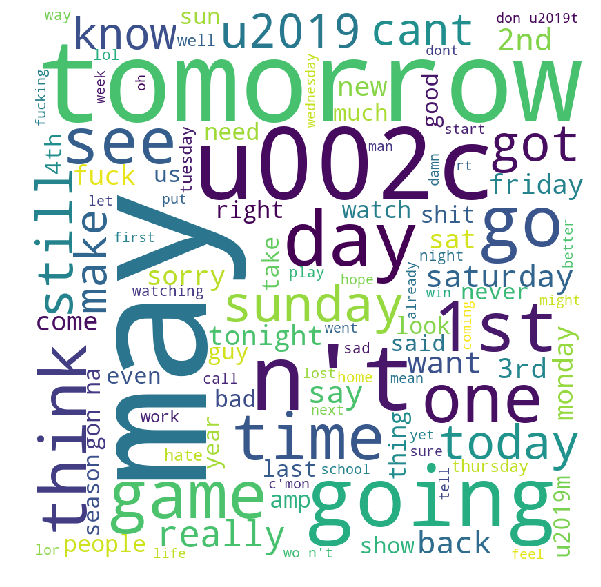

In [ ]:
negativeText = ''
for tweet in negativeTweetList:
    for word in tweet:
        negativeText = negativeText + word + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 20).generate(negativeText)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

    Neutral Tweets Word Cloud

In [ ]:
neutralText = ''
for tweet in neutralTweetList:
    for word in tweet:
        neutralText = neutralText + word + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 20).generate(neutralText)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()